# Areas geojson

In [1]:
using GeoJSON, GLMakie, GeoMakie, Makie

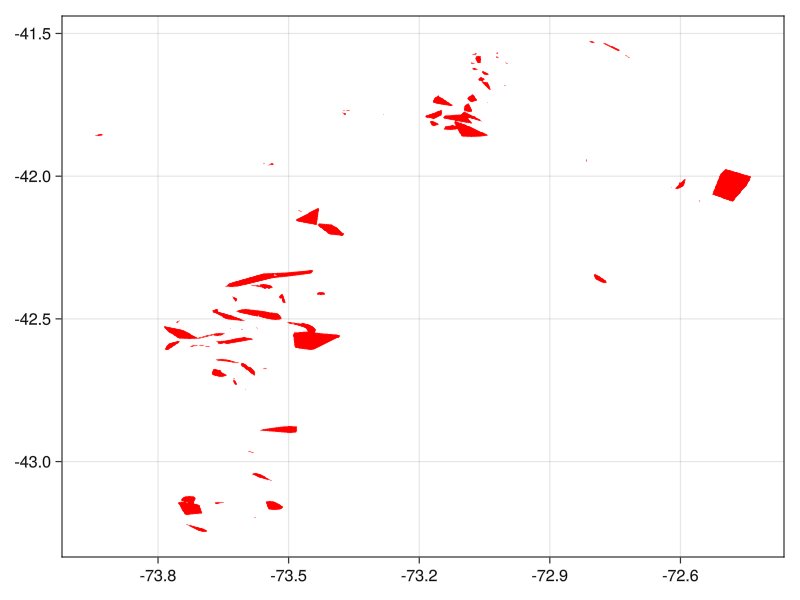

In [15]:
path = "./data/areas_geojson/areas_psmb.geojson"
areas = GeoJSON.read(read(path))

#println(fc[1])
#fc[1].geometry[:]
poly(areas, color = :red, alpha =.1) 


In [9]:
path = "./data/LosLagos.geojson"

los_lagos = GeoJSON.read(read(path))

poly(los_lagos, strokecolor = :blue)

poly!(fc)

Poly{Tuple{Vector{GeometryBasics.MultiPolygon{2, Float32, GeometryBasics.Polygon{2, Float32, Point{2, Float32}, GeometryBasics.LineString{2, Float32, Point{2, Float32}, Base.ReinterpretArray{GeometryBasics.Line{2, Float32}, 1, Tuple{Point{2, Float32}, Point{2, Float32}}, GeometryBasics.TupleView{Tuple{Point{2, Float32}, Point{2, Float32}}, 2, 1, Vector{Point{2, Float32}}}, false}}, Vector{GeometryBasics.LineString{2, Float32, Point{2, Float32}, Base.ReinterpretArray{GeometryBasics.Line{2, Float32}, 1, Tuple{Point{2, Float32}, Point{2, Float32}}, GeometryBasics.TupleView{Tuple{Point{2, Float32}, Point{2, Float32}}, 2, 1, Vector{Point{2, Float32}}}, false}}}}, Vector{GeometryBasics.Polygon{2, Float32, Point{2, Float32}, GeometryBasics.LineString{2, Float32, Point{2, Float32}, Base.ReinterpretArray{GeometryBasics.Line{2, Float32}, 1, Tuple{Point{2, Float32}, Point{2, Float32}}, GeometryBasics.TupleView{Tuple{Point{2, Float32}, Point{2, Float32}}, 2, 1, Vector{Point{2, Float32}}}, false}},

In [38]:
chile_geo[1].geometry[:]

1-element Vector{Any}:
 JSON3.Array[[-69.4153, -17.6552], [-69.3366, -17.7322], [-69.2821, -17.9682], [-69.2558, -17.954], [-69.2306, -17.9891], [-69.1209, -18.0044], [-69.057, -18.0612], [-69.1461, -18.1638], [-69.0639, -18.2309], [-69.0742, -18.2874]  …  [-70.0504, -18.2692], [-69.9852, -18.2697], [-69.8605, -18.1705], [-69.7546, -17.9892], [-69.8222, -17.7439], [-69.7962, -17.6459], [-69.6664, -17.6603], [-69.4684, -17.4983], [-69.4678, -17.6048], [-69.4153, -17.6552]]